# Jim's take on using `SciPy`

## `scipy.constants`: Universal constants

In [17]:
from scipy.constants import pi, golden, e, c, h, G, g, Avogadro, Boltzmann

# Mathematical constants
print(f"Pi: {pi}")  # The ratio of a circle's `1circumference to its diameter
print(f"Golden Ratio: {golden}")  # (1 + sqrt(5)) / 2, appears in various natural patterns
print(f"Euler's Number: {e}")  # Base of the natural logarithm, approximately 2.718

# Physical constants
print(f"Speed of Light (c): {c} m/s")  # The speed at which light propagates in a vacuum
print(f"Planck's Constant (h): {h} J·s")  # Relates the energy of a photon to its frequency
print(f"Gravitational Constant (G): {G} m^3/kg/s^2")  # Describes the strength of gravitation
print(f"Acceleration due to Gravity (g): {g} m/s^2")  # Standard acceleration of free fall on Earth

# Scientific constants
print(f"Avogadro's Number: {Avogadro} 1/mol")  # Number of constituent particles per mole of a substance
print(f"Boltzmann Constant: {Boltzmann} J/K")  # Relates the average kinetic energy of particles to temperature

Pi: 3.141592653589793
Golden Ratio: 1.618033988749895
Euler's Number: 1.602176634e-19
Speed of Light (c): 299792458.0 m/s
Planck's Constant (h): 6.62607015e-34 J·s
Gravitational Constant (G): 6.6743e-11 m^3/kg/s^2
Acceleration due to Gravity (g): 9.80665 m/s^2
Avogadro's Number: 6.02214076e+23 1/mol
Boltzmann Constant: 1.380649e-23 J/K


## `scipy.differentiate`

In [18]:

import numpy as np
from scipy.differentiate import derivative

# Example 1. the np exp() function
# Any arbitrary function that takes a single float arg
f = np.exp
df = np.exp  # true derivative
x = np.linspace(1, 2, 5)
res = derivative(f, x)
print(f"derivative results:\n{res}")  # approximation of the derivative

# Define our function, f(x)
def f_x_squared(x):
    return x ** 2
#    return x ** 3 + 2 * x + math.sin(x)

# Compute the derivative at a specific point
x_point = 2  # Point at which the derivative is to be computed
x = np.linspace(-1.0, 1.0, 5)
result = derivative(f_x_squared, x)
#result = derivative(my_function, x_point, dx=1e-6)

print(f"derivative results:\n{result}")

derivative results:
     success: [ True  True  True  True  True]
      status: [0 0 0 0 0]
          df: [ 2.718e+00  3.490e+00  4.482e+00  5.755e+00  7.389e+00]
       error: [ 7.131e-12  9.170e-12  1.174e-11  1.508e-11  1.938e-11]
         nit: [2 2 2 2 2]
        nfev: [11 11 11 11 11]
           x: [ 1.000e+00  1.250e+00  1.500e+00  1.750e+00  2.000e+00]
derivative results:
     success: [ True  True  True  True  True]
      status: [0 0 0 0 0]
          df: [-2.000e+00 -1.000e+00  0.000e+00  1.000e+00  2.000e+00]
       error: [ 8.882e-16  2.220e-16  0.000e+00  6.661e-16  2.665e-15]
         nit: [2 2 2 2 2]
        nfev: [11 11 11 11 11]
           x: [-1.000e+00 -5.000e-01  0.000e+00  5.000e-01  1.000e+00]


## `scipy.fft` - Fast-Fourier Transforms

In [19]:
# TODO FFT usage

## `scipy.ndimage`: N-Dimensional interpolation for equally-spaced data

The scipy.ndimage package also contains spline\_filter and
map\_coordinates which can be used to perform N-dimensional
interpolation for equally-spaced data. A two-dimensional example is
given below:

In [20]:
from numpy import ogrid, mgrid, sin, array
from scipy import ndimage
from matplotlib import pyplot as plt

x,y = ogrid[-1:1:5j,-1:1:5j]
fvals = sin(x)*sin(y)
newx,newy = mgrid[-1:1:100j,-1:1:100j]
x0 = x[0,0]
y0 = y[0,0]
dx = x[1,0] - x0
dy = y[0,1] - y0
ivals = (newx - x0)/dx
jvals = (newy - y0)/dy
coords = array([ivals, jvals])
newf1 = ndimage.map_coordinates(fvals, coords)

To pre-compute the weights (for multiple interpolation results), you
would use

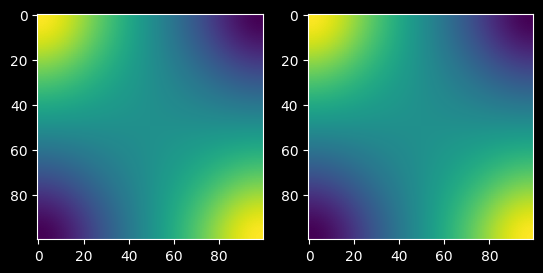

In [21]:
coeffs = ndimage.spline_filter(fvals)
newf2 = ndimage.map_coordinates(coeffs, coords, prefilter=False)

plt.style.use("dark_background")
plt.subplot(1,2,1)
plt.imshow(newf1)
plt.subplot(1,2,2)
plt.imshow(newf2)
plt.show()

## `scipy.integrate`

In [22]:
# TODO integration usage

## `scipy.interpolation`: Interpolation of an N-D curve

The scipy.interpolate packages wraps the netlib FITPACK routines
(Dierckx) for calculating smoothing splines for various kinds of data
and geometries. Although the data is evenly spaced in this example, it
need not be so to use this routine.

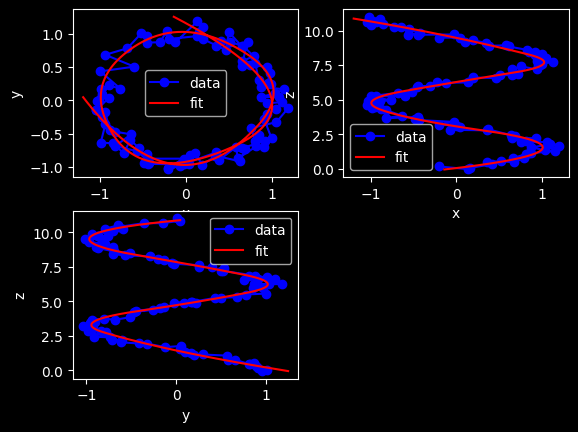

In [23]:
from numpy import cos, linspace, pi, sin, random
from scipy.interpolate import splprep, splev
from matplotlib import pyplot

# make ascending spiral in 3-space
t=linspace(0,1.75*2*pi,100)

x = sin(t)
y = cos(t)
z = t

# add noise
x+= random.normal(scale=0.1, size=x.shape)
y+= random.normal(scale=0.1, size=y.shape)
z+= random.normal(scale=0.1, size=z.shape)

# spline parameters
s=3.0 # smoothness parameter
k=2 # spline order
nest=-1 # estimate of number of knots needed (-1 = maximal)

# find the knot points
tckp, u = splprep([x,y,z],s=s,k=k,nest=-1)

# evaluate spline, including interpolated points
xnew,ynew,znew = splev(linspace(0,1,400),tckp)

#import pylab

pyplot.subplot(2,2,1)
data,=pyplot.plot(x,y,'bo-',label='data')
fit,=pyplot.plot(xnew,ynew,'r-',label='fit')
pyplot.legend()
pyplot.xlabel('x')
pyplot.ylabel('y')

pyplot.subplot(2,2,2)
data,=pyplot.plot(x,z,'bo-',label='data')
fit,=pyplot.plot(xnew,znew,'r-',label='fit')
pyplot.legend()
pyplot.xlabel('x')
pyplot.ylabel('z')

pyplot.subplot(2,2,3)
data,=pyplot.plot(y,z,'bo-',label='data')
fit,=pyplot.plot(ynew,znew,'r-',label='fit')
pyplot.legend()
pyplot.xlabel('y')
pyplot.ylabel('z')
plt.show()

## `scipy.linalg`: Linear Algebra, eigenvectors and such

### Eigenvectors and EigenValues

In [24]:
import numpy as np
from scipy.linalg import eig

# Define a square matrix
matrix = np.array([[4, -2],
                   [1,  1]])

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(matrix)

# Print the results
print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)



Eigenvalues:
[3.+0.j 2.+0.j]
Eigenvectors:
[[0.89442719 0.70710678]
 [0.4472136  0.70710678]]


### `solve()` for n x n linear equations

In [25]:
import numpy as np
from scipy.linalg import solve

# Define the linear system of equations Ax = b
A = np.array([[3, 2], [1, 4]])
b = np.array([6, 8])

# Solve for x
x = solve(A, b)

# Print the solution
print("Solution for x:", x)

Solution for x: [0.8 1.8]


## `scipy.odr`

## `scipy.optimize`: Optimization

SciPy's optimization package is scipy.optimize. The most basic
non-linear optimization functions are:

* `optimize.fmin(func, x0)`, which finds the minimum of func(x) starting x with x0 (x can be a vector)
* `optimize.fsolve(func, x0)`, which finds a solution to func(x) = 0 starting with x = x0 (x can be a vector)
* `optimize.fminbound(func, x1, x2)`, which finds the minimum of a scalar function func(x) for the range [x1,x2] (x1,x2 must be a scalar and func(x) must return a scalar)

See the [scipy.optimze documentation](http://docs.scipy.org/doc/scipy/reference/optimize.html) for details.

This is a quick demonstration of generating data from several Bessel
functions and finding some local maxima using fminbound. This uses ipython with the -pylab switch.

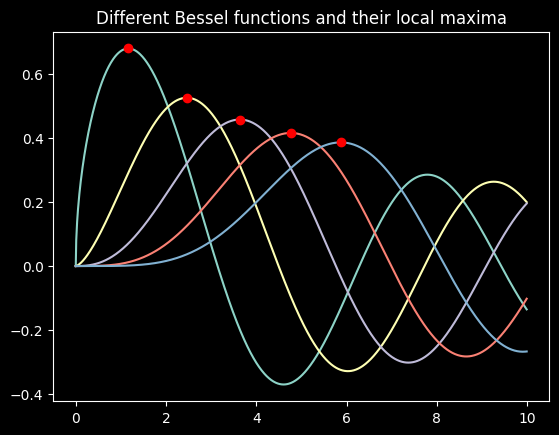

In [26]:
from numpy import arange
from matplotlib.pyplot import plot, title, show
from scipy import optimize, special

x = arange(0,10,0.01)

for k in arange(0.5,5.5):
     y = special.jv(k,x)
     plot(x,y)
     f = lambda x: -special.jv(k,x)
     x_max = optimize.fminbound(f,0,6)
     plot([x_max], [special.jv(k,x_max)],'ro')

title('Different Bessel functions and their local maxima')
show()

## `scipy.signal`
See ./jims_scipy_signals.ipynb

## `scipy.sparse`

In [27]:
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Dense data
data = np.array([
    [0, 0, 1],
    [0, 2, 0],
    [3, 0, 0],
    [0, 4, 5]
])

# Convert dense matrix to sparse matrix
sparse_data = csr_matrix(data)
print("Sparse Matrix Representation:")
print(sparse_data)

# Prepare sample data for ML
X = sparse_data  # Features (sparse matrix used directly)
y = np.array([0, 1, 0, 1])  # Target labels

# Split the data (keeping sparse format for efficiency)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#print(np.unique(y_train, return_counts=True))


# Assuming X (features) and y (target) are already defined
# Ensure that the split preserves class proportions using stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=2, stratify=y, random_state=42
)

# Check the distribution of classes in y_train
unique_classes, class_counts = np.unique(y_train, return_counts=True)
print(f"Classes: {unique_classes}, Counts: {class_counts}")

# Proceed if there are at least two classes
if len(unique_classes) < 2:
    raise ValueError("Insufficient class variability in training data.")


# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")


Sparse Matrix Representation:
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (4, 3)>
  Coords	Values
  (0, 2)	1
  (1, 1)	2
  (2, 0)	3
  (3, 1)	4
  (3, 2)	5
Classes: [0 1], Counts: [1 1]
Model accuracy: 0.50


## `scipy.spatial`

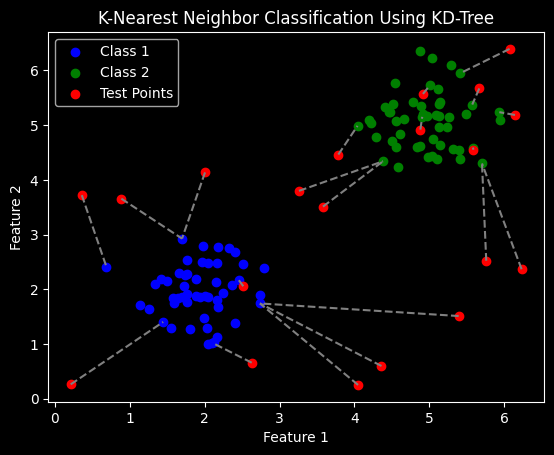

In [28]:
import numpy as np
from scipy.spatial import KDTree
import matplotlib.pyplot as plt

# Step 1: Generate random 2D data points for two classes
np.random.seed(42)  # For reproducibility
class1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
class2 = np.random.normal(loc=[5, 5], scale=0.5, size=(50, 2))

# Labels for the classes
data = np.vstack((class1, class2))
labels = np.array([0] * 50 + [1] * 50)

# Step 2: Build a KD-Tree for nearest-neighbor search
tree = KDTree(data)

# Step 3: Generate test data points
test_points = np.random.uniform(low=0, high=7, size=(20, 2))

# Step 4: Query nearest neighbor for each test point
distances, indices = tree.query(test_points, k=1)  # Find the nearest neighbor
predicted_labels = labels[indices]  # Retrieve class labels based on the nearest neighbor

# Plot the dataset and the test classification
plt.scatter(class1[:, 0], class1[:, 1], color="blue", label="Class 1")
plt.scatter(class2[:, 0], class2[:, 1], color="green", label="Class 2")
plt.scatter(test_points[:, 0], test_points[:, 1], color="red", label="Test Points")
for i, point in enumerate(test_points):
    plt.plot([point[0], data[indices[i]][0]], [point[1], data[indices[i]][1]], "gray", linestyle="--")
plt.legend()
plt.title("K-Nearest Neighbor Classification Using KD-Tree")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Miscellaneous: `scipy.datasets`, `scipy.special`, `scipy.cluster`

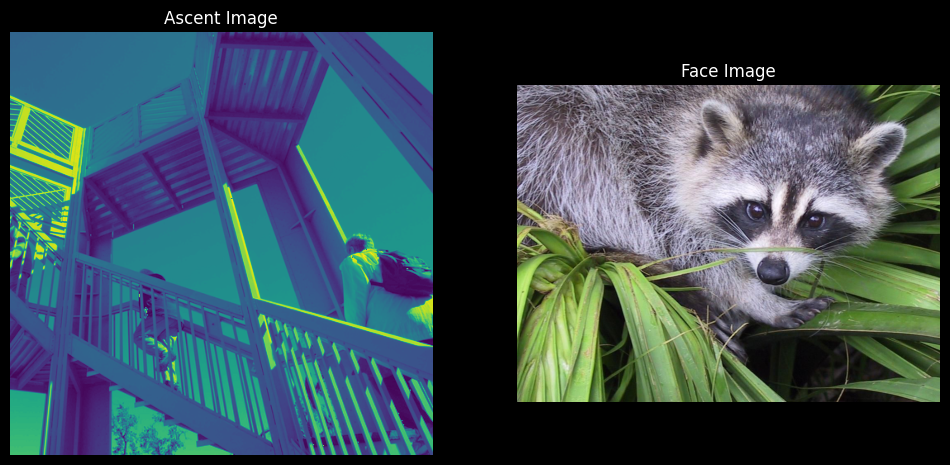

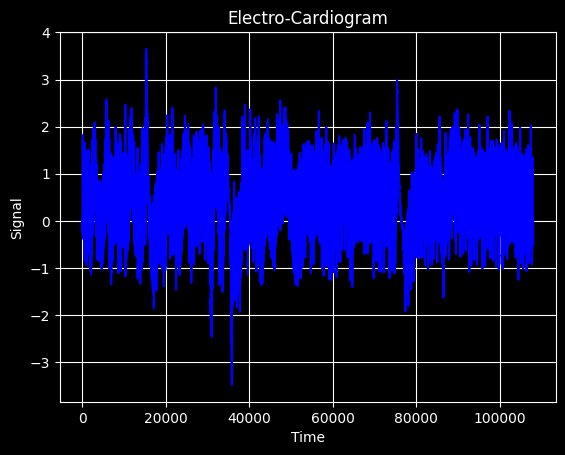

In [29]:
from scipy.datasets import ascent, face, electrocardiogram
import matplotlib.pyplot as plt

plt.rcdefaults()

# Load the "ascent" test image
ascent_image = ascent()

# Load the "face" test image
face_image = face()

electro = electrocardiogram()

# Plot both images
#fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display ascent image
#ax[0].imshow(ascent_image, cmap="gray")

# print(plt.style.available)

plt.style.use("dark_background")
#plt.style.use("classic")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
#plt.imshow(ascent_image, cmap="gray", alpha=1.0)
plt.imshow(ascent_image)
plt.title("Ascent Image")
plt.axis("off")

plt.subplot(1, 2, 2)
# Display face image
#plt.imshow(face_image, cmap="magma", alpha=1.0)
plt.imshow(face_image)
plt.title("Face Image")
plt.axis("off")

# ax[].axis("off")  # Leave the last axis empty to maintain alignment
# plt.tight_layout()
plt.show()

# Plot electrocardiogram
plt.plot(electro, color="blue")
plt.title("Electro-Cardiogram")
plt.xlabel("Time")
plt.ylabel("Signal")
plt.grid(True)

plt.show()


# Using `pint` to control Units, Quantities

In [30]:
from pint import UnitRegistry

# Create a UnitRegistry
ureg = UnitRegistry()

# Define quantities with units
distance = 5 * ureg.meter
time = 10 * ureg.second

# Perform calculations
speed = distance / time
print(f"Speed: {speed}")  # Speed: 0.5 meter / second

# Convert to a different unit
speed_in_kmh = speed.to(ureg.kilometer / ureg.hour)
print(f"Speed in km/h: {speed_in_kmh}")  # Speed in km/h: 1.8 kilometer / hour


Speed: 0.5 meter / second
Speed in km/h: 1.7999999999999998 kilometer / hour
